<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/lecture_02_math_prerequisites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Math Prerequisites

* O-notation and complexity
* what is a set, function/map
* numbers, bits/binary operations, hex
* elementary probability theory, bimomial coefficients
* elementary combinatorics
* formula for sum of arithmetic progression, formula for sum of geometric progression, formula for the sum of odd numbers
* prime numbers, divisors, GCD, GCR, modulo algebra
* elementary geometry: perimeter/area, rotations

# Complexity

**Family of Bachmann–Landau notations**

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Notation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Name | Description | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Formal Definition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Limit Definition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
| --- | --- | --- | --- | --- |
| $f(n) = O(g(n))$ | Big O; Big Oh; Big Omicron | $|f|$ is bounded above by $g$ (up to constant factor) asymptotically | $\exists k > 0:  \exists n_0:  \forall n>n_0:  |f(n)|\leq k g(n)$ | $\limsup_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} < \infty$ |
| $f(n) = \Theta(g(n))$ | Big Theta | $f \text{ is bounded both above and below by } g \text{ asymptotically}$ | $\exists k_1 > 0 ~ \exists k_2>0 ~ \exists n_0 ~ \forall n > n_0 \text{ : } k_1 \cdot g(n) \leq f(n) \leq k_2 \cdot g(n)$ | $f(n) = O(g(n)) \text{ and } f(n) = \Omega(g(n)) \text{ (Knuth version)}$ |
| $f(n) = \Omega(g(n))$ | Big Omega in complexity theory (Knuth) | $f$ is bounded below by $g$ asymptotically | $\exists k > 0  \exists n_0  \forall  n>n_0\colon   f(n) \geq k\cdot g(n)$ | $\liminf_{n \to \infty} \frac{f(n)}{g(n)} > 0 $|
| $f(n) = o(g(n))$ | Small O; Small Oh | $f$ is dominated by $g$ asymptotically | $\forall k>0  \exists n_0  \forall n > n_0\colon  |f(n)| < k\cdot g(n)$ | $\lim_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} = 0$ |
| $f(n)\sim g(n)$ | On the order of | $f$ is equal to $g$ asymptotically | $\forall \varepsilon > 0 \exists n_0\forall n > n_0\colon \left| \frac{f(n)}{g(n)} - 1 \right|  < \varepsilon$ | $\lim_{n \to \infty} \frac{f(n)}{g(n)} = 1$ |
| $f(n) = \omega(g(n))$ | Small Omega | $f$ dominates $g$ asymptotically | $\forall k > 0 \exists n_0 \forall n > n_0 \colon$  $|f(n)| > k\cdot |g(n)|$ | $\lim_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} = \infty$ |
| $f(n) = \Omega(g(n))$ | Big Omega in number theory (Hardy-Littlewood) | $|f|$ is not dominated by $g$ asymptotically | $\exists k>0 \forall n_0 \exists n > n_0\colon |f(n)| \geq k\cdot g(n)$ | $\limsup_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} > 0 $ |

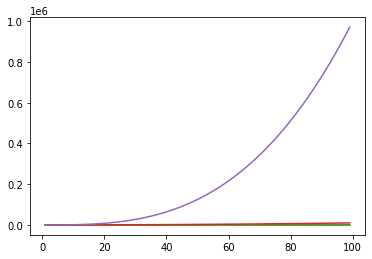

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = range(1, 100)
funcs = [lambda x: x * np.log(x), lambda x: np.log(x), lambda x: x, lambda x: np.power(x,2), lambda x: np.power(x,3)]
for f in funcs:
  plt.plot(x, f(x))

### Common misconceptions

* complexity $O(N)=O(N-k)=O(N/k)$

### Quiz

Simplify

* $O(n^2 + 2n + 3)$
* $O(2^n + n^3 - 5)$
* $O(n \ln(n) + n^{100})$
* $O(n^2 \ln(n) + 100 n \ln(n))$
* $O(\sqrt{n} + \ln(n) + 2 n)$
* $O(n/2 + 3)$
* $O(2^{n - 30} + n^2)$

Compare

* $O(n)$ and $O(2n)$
* $O((n + 5)^2)$ and $O(n^2/3)$

|time complexity|algorithm|
---|---
|$O(2^n)$|binary tree traversal on depth|
|$O(n^2)$| bubble sort of 1D array|
|$O(n\ln(n))$|merge sort, average for quicksort, heapsort, D&C|
|$O(n)$|max in array, two pointers|
|$O(\ln(n))$|binary search|
|$O(\sqrt{n})$|number of divisors|
|$O(1)$|closed-form formulas|
|$O(nm)$|2D matrix traversal|
|$O(v+e)$|bfs, dfs|

## Fibonacci in $O(2^n)$, $O(n)$, and $O(\ln(n))$

In [ ]:
def fib_rec(N):
  if N <= 1:
    return 1
  return fib_rec(N-1) + fib_rec(N-2)

%timeit fib_rec(20)

2.79 ms ± 81.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def fib_iter(N):
  a, b = 1, 1
  for _ in range(N):
    a, b = b, a+b
  return a

%timeit fib_iter(1000)

217 µs ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import numpy as np

def fib_matrix(N):
  M = np.array([[1,1],[1,0]])
  P = np.array([[1,0],[0,1]])
  while N:
    if 1 & N: P = np.dot(P,M);
    N = N // 2
    M = np.dot(M,M)
  return np.dot(P, np.array([1, 1]))[1]


%timeit fib_matrix(1000)

32.2 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


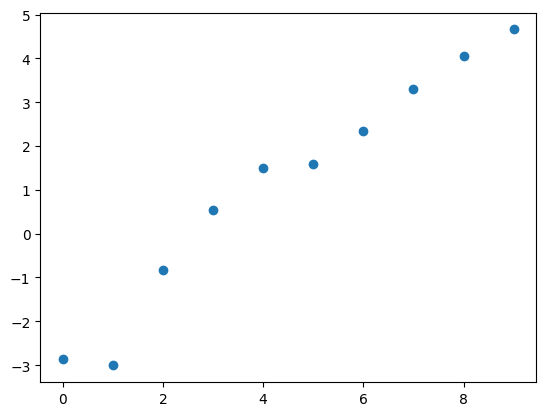

In [ ]:
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt

A = np.array(range(10))
T = []
for i in A:
  T.append(timeit('fib_rec(i)', 'from __main__ import fib_rec, i'))
T = np.array(T)
plt.scatter(A, np.log2(T))
plt.draw()
plt.show()

## Quiz

In [ ]:
lst = list(range(100))

for idx in range(len(lst)):
  pass

In [ ]:
lst = list(range(100))

for idx in range(len(lst)):
  pass

for idx in range(len(lst)):
  pass

In [ ]:
lst = list(range(100))

for idx1 in range(len(lst)):
  for idx2 in range(10):
    ...

In [ ]:
lst = list(range(100))

for idx1 in range(len(lst)):
  for idx2 in range(len(lst)):
    ...

In [ ]:
lst = list(range(100))

for idx1 in range(len(lst)):
  for idx2 in range(idx1):
    ...

In [ ]:
lst = list(range(100))

idx1, idx2 = 0, 0

while idx1 < len(lst) and idx2 < len(lst):
  if ...:
    idx1 += 1
  else:
    idx2 += 1


In [ ]:
lst = list(range(100))

idx1, idx2 = 0, len(lst) - 1

while idx1 < idx2:
  if ...:
    idx1 += 1
  else:
    idx2 -= 1


In [ ]:
def f(N):
  if N == 0: return 0
  f(N-1), f(N-1)

In [ ]:
def f(N):
  if N == 0: return 0
  for i in range(N-1):
    f(i)

In [ ]:
k = 15
def f(N):
  if N == 0: return 0
  for i in range(k):
    f(i)

In [ ]:
def b(L, R):
  if L == R: return ...
  if ...:
    b((L+R)/2,R)
  else:
    b(L, (L+R)/2)

In [ ]:
#@title Problem-Solving Cycle
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="225mm" height="90mm" version="1.1" viewBox="0 0 306.56 120.31" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns7="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker2515" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-3" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-2" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-3-6" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-39.633 22.705)">
  <g transform="translate(69.843 47.184)" ns7:alignment="middle center" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$9 6 0 8 0 9 6$" ns7:version="1.1.0">
   <defs id="id-ede1eb28-7eab-4f7d-bc35-b221ca771c9b"></defs>
   <g transform="translate(-149.13 -128.12)">
    <g fill="#000000">
     <rect x="138.41" y="58.368" width="99.03" height="26.458" fill="#000000" fill-opacity=".15909" opacity=".999"/>
     <text x="158.79012" y="74.519356" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="158.79012" y="74.519356" stroke-width=".26458"> Problem</tspan></text>
     <rect x="138.35" y="151.07" width="99.03" height="26.458" fill="#000000" fill-opacity=".15909" opacity=".999"/>
     <text x="147.64009" y="167.56235" fill="#000000" font-family="'Courier New'" font-size="9.6314px" font-weight="bold" stroke-width=".24078" style="line-height:1.25" xml:space="preserve"><tspan x="147.64009" y="167.56235" stroke-width=".24078">Simple problem</tspan></text>
     <path d="m186.79 85.96v61.799" fill="none" marker-end="url(#marker2515)" stroke="#000000" stroke-width=".665"/>
     <path d="m241.96 164.58h61.799" fill="none" marker-end="url(#marker2515-3)" stroke="#000000" stroke-width=".665"/>
     <g fill="#000000">
      <rect x="305.48" y="151.35" width="99.889" height="27.197" fill-opacity=".15909" opacity=".999"/>
      <rect x="303.02" y="58.368" width="99.03" height="26.458" fill-opacity=".15909" opacity=".999"/>
      <text x="323.80103" y="74.484665" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="323.80103" y="74.484665" stroke-width=".26458"> Solution</tspan></text>
     </g>
     <g transform="translate(39.927 42.952)" ns7:alignment="middle center" ns7:inkscapeversion="1.0" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$simplification$\n$solve$\n$generalization$" ns7:version="1.1.0">
      <defs></defs>
      <g transform="translate(-149.23 -127.73)" fill="#000000">
       <g transform="translate(78.997 69.17)">
        <g transform="translate(148.71 134.76)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(153.38 134.76)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(156.82 134.76)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(165.56 134.76)">
         <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
        </g>
        <g transform="translate(170.57 134.76)">
         <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
        </g>
       </g>
       <g id="id-86416669-2d66-489f-8f3d-f96909de8afd" transform="translate(78.997 69.17)">
        <g transform="translate(173.75 134.76)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(177.18 134.76)">
         <path id="id-b176aadc-f987-4c83-96e7-361f6e72130b" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
        </g>
       </g>
       <g id="id-649d9adb-efed-4e1f-b133-57b0854859ad" transform="translate(78.997 69.17)">
        <g transform="translate(183.12 134.76)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(186.55 134.76)">
         <path id="id-56ab872f-7640-4b0e-b68e-f96ee594561f" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
        </g>
        <g transform="translate(190.87 134.76)">
         <path id="id-1bccc64e-2fae-48e4-91e3-343572b7f3fd" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(196.13 134.76)">
         <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(199.73 134.76)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(203.16 134.76)">
         <path id="id-66434eae-13d7-4f65-806a-440d05ac330e" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
        </g>
        <g transform="translate(207.99 134.76)">
         <path id="id-be746d11-fe02-4f0d-a02d-7f60a05fb88c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g transform="translate(149.68 107.35)">
        <g transform="translate(217.3 134.76)">
         <path id="id-b2a50f9c-508c-4cc7-ad7c-e1e74e8f613d" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(221.97 134.76)">
         <path id="id-e78deafe-f3a1-4898-9326-e59501e4192a" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
        </g>
        <g transform="translate(226.8 134.76)">
         <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
        </g>
       </g>
       <g transform="translate(149.68 107.35)">
        <g transform="translate(229.96 134.76)">
         <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
        </g>
       </g>
       <g transform="translate(149.68 107.35)">
        <g transform="translate(235.15 134.76)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g transform="translate(226.79 72.571)">
        <g transform="translate(243.1 134.76)">
         <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
        </g>
       </g>
       <g transform="translate(226.79 72.571)">
        <g transform="translate(248.21 134.76)">
         <path id="id-8fbcaae3-a76e-4d6e-a689-d0213de35b9b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(252.85 134.76)">
         <path id="id-727137ef-df44-4a73-aaf8-cb657cf81dfa" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(258.83 134.76)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(263.47 134.76)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g id="id-83b187a8-b06e-46ad-97ce-99a9e9d40c5a" transform="translate(226.79 72.571)">
        <g transform="translate(268.24 134.76)">
         <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(273.51 134.76)">
         <path id="id-d12fed5a-1128-449c-acf9-5fe4689bcd5b" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
        </g>
       </g>
       <g transform="translate(226.79 72.571)">
        <g transform="translate(276.68 134.76)">
         <path id="id-2f77da8e-edee-45d2-8e5a-360cfbf4bbad" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(280.12 134.76)">
         <path d="m1.3281-0.82812c0.53125-0.57812 0.82812-0.82812 1.1875-1.1406 0 0 0.60938-0.53125 0.96875-0.89062 0.95312-0.92188 1.1719-1.4062 1.1719-1.4531 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.078125 0-0.09375 0.015625-0.15625 0.10938-0.29688 0.48438-0.5 0.64062-0.73438 0.64062-0.25 0-0.35938-0.15625-0.51562-0.32812-0.1875-0.21875-0.35938-0.42188-0.6875-0.42188-0.75 0-1.2031 0.92188-1.2031 1.1406 0 0.046875 0.03125 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.046875 0.14062-0.10938 0.1875-0.46875 0.76562-0.46875 0.84375-0.46875 0.20312 0 0.39062 0.0625 0.625 0.14062 0.40625 0.15625 0.51562 0.15625 0.76562 0.15625-0.35938 0.42188-1.1875 1.1406-1.375 1.2969l-0.90625 0.84375c-0.67188 0.67188-1.0312 1.2344-1.0312 1.3125 0 0.09375 0.10938 0.09375 0.125 0.09375 0.078125 0 0.09375-0.015625 0.15625-0.125 0.23438-0.35938 0.53125-0.625 0.85938-0.625 0.21875 0 0.32812 0.09375 0.57812 0.375 0.15625 0.21875 0.34375 0.375 0.625 0.375 1 0 1.5781-1.2656 1.5781-1.5312 0-0.046875-0.046875-0.10938-0.125-0.10938-0.09375 0-0.10938 0.0625-0.14062 0.14062-0.23438 0.64062-0.875 0.82812-1.2031 0.82812-0.1875 0-0.375-0.0625-0.57812-0.125-0.34375-0.125-0.5-0.17188-0.70312-0.17188-0.015625 0-0.17188 0-0.26562 0.03125z"/>
        </g>
       </g>
       <g id="id-afe28c08-fdea-4ad8-8142-d87c246696dd" transform="translate(226.79 72.571)">
        <g transform="translate(285.19 134.76)">
         <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(290.45 134.76)">
         <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(294.05 134.76)">
         <path id="id-b8895041-9e1c-4cdf-93ad-ecc6468dc53d" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(297.48 134.76)">
         <path id="id-6e261084-c230-406a-9825-2917ba3d165a" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
        </g>
        <g transform="translate(302.31 134.76)">
         <path id="id-ce078a72-d42e-4e23-a184-e48ff201a9eb" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
      </g>
     </g>
     <path d="m354.85 149.65v-61.799" fill="none" marker-end="url(#marker2515-2)" stroke="#000000" stroke-width=".665"/>
     <path d="m239.17 70.49h61.799" fill="none" marker-end="url(#marker2515-3-6)" stroke="#000000" stroke-dasharray="3.99001, 3.99001" stroke-width=".665"/>
     <text x="324.75534" y="161.9733" fill="#000000" font-family="'Courier New'" font-size="7.8369px" font-weight="bold" stroke-width=".19592" style="line-height:1.25" xml:space="preserve"><tspan x="324.75534" y="161.9733">Solution of </tspan><tspan x="324.75534" y="171.76939">simple problem</tspan></text>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
#@title Problem-Solving Cycle
%%html

<svg width="213mm" height="175mm" version="1.1" viewBox="0 0 233.2 272.69" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns7="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker2515" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-39" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-1" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-1-5" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-30" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-39-3" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(10.153 22.573)">
  <g transform="translate(69.843 47.184)" ns7:alignment="middle center" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$9 6 0 8 0 9 6$" ns7:version="1.1.0">
   <defs id="id-ede1eb28-7eab-4f7d-bc35-b221ca771c9b"></defs>
   <g transform="translate(-149.13 -128.12)">
    <g fill="#000000">
     <g fill="#000000">
      <g fill-opacity=".15909">
       <rect x="70.478" y="136.41" width="99.03" height="26.458" opacity=".999"/>
       <rect x="203.31" y="136.14" width="99.03" height="26.458" opacity=".999"/>
       <rect x="139.27" y="304.6" width="99.03" height="26.458" opacity=".999"/>
      </g>
      <text x="154.17296" y="322.45581" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="154.17296" y="322.45581" stroke-width=".26458">Solution</tspan></text>
      <rect x="138.41" y="58.368" width="99.03" height="26.458" fill-opacity=".15909" opacity=".999"/>
     </g>
     <text x="146.31689" y="75.84227" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="146.31689" y="75.84227" stroke-width=".26458"> Problem</tspan></text>
     <path d="m186.79 85.96-66.817 48.97" fill="none" marker-end="url(#marker2515)" stroke="#000000" stroke-width=".665"/>
     <g transform="translate(65.551 36.995)" ns7:alignment="middle center" ns7:inkscapeversion="1.0" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$N$\n$N^{'}$\n$N^{''}$\n$subdivide$\n$solve$\n$combine$" ns7:version="1.1.0">
      <defs></defs>
      <g transform="translate(-149.1 -125.36)" fill="#000000">
       <g id="id-f66a1eb6-752c-44e8-86eb-01ef42fb469e" transform="matrix(1.38 0 0 1.38 .80286 57.646)">
        <g transform="translate(161.12 134.76)">
         <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
        </g>
       </g>
       <g transform="matrix(1.38 0 0 1.38 .80286 57.646)">
        <g transform="translate(170.21 128.14)">
         <path id="id-135ebc19-a8a6-459b-9fc0-c9eff25fb65d" d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
        </g>
       </g>
       <g id="id-efd5727e-1d1b-4439-a02f-ce1b5436a52c" transform="matrix(1.38 0 0 1.38 180.15 79.191)">
        <g transform="translate(126.33 119.29)">
         <path id="id-1784fd30-b6d0-4869-b7c7-70bc05cd017a" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
        </g>
       </g>
       <g transform="matrix(1.38 0 0 1.38 110.6 57.835)">
        <g transform="translate(185.82 128.14)">
         <path id="id-a61c348f-58c4-4359-9a79-14a17b757f8c" d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
        </g>
        <g transform="translate(188.02 128.14)">
         <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
        </g>
       </g>
       <g id="id-016d9da4-07f3-4767-930f-d1c6b630e99f" transform="translate(54.807 68.036)">
        <g transform="translate(194.53 134.76)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(199.2 134.76)">
         <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
        </g>
        <g transform="translate(204.9 134.76)">
         <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
        </g>
        <g transform="translate(209.18 134.76)">
         <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(214.36 134.76)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(217.8 134.76)">
         <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
        </g>
       </g>
       <g transform="translate(54.807 68.036)">
        <g transform="translate(222.98 134.76)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(226.42 134.76)">
         <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(231.6 134.76)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g transform="translate(256.68 372.89)">
        <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
       </g>
       <g transform="translate(260.99 372.89)">
        <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(265.82 372.89)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
       <g transform="translate(274.57 372.89)">
        <path id="id-7074411f-7f3d-4c8a-82ba-4efbbb6ef91b" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
       </g>
       <g transform="translate(278.84 372.89)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(282.27 372.89)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
       <g transform="translate(288.25 372.89)">
        <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="matrix(1.1803 0 0 1.1803 112.16 5.117)">
        <g transform="translate(148.71 134.76)">
         <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
        </g>
       </g>
       <g transform="translate(-30.769 150.62)">
        <g transform="translate(239.56 134.76)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(244.23 134.76)">
         <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
        </g>
        <g transform="translate(249.06 134.76)">
         <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
        </g>
       </g>
       <g transform="translate(-30.769 150.62)">
        <g transform="translate(252.23 134.76)">
         <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
        </g>
       </g>
       <g transform="translate(-30.769 150.62)">
        <g transform="translate(257.42 134.76)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g transform="translate(107.41 150.08)">
        <g transform="translate(239.56 134.76)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(244.23 134.76)">
         <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
        </g>
        <g transform="translate(249.06 134.76)">
         <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
        </g>
       </g>
       <g transform="translate(107.41 150.08)">
        <g transform="translate(252.23 134.76)">
         <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
        </g>
       </g>
       <g transform="translate(107.41 150.08)">
        <g transform="translate(257.42 134.76)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g transform="matrix(1.1803 0 0 1.1803 117.9 251.8)">
        <g transform="translate(148.71 134.76)">
         <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
        </g>
       </g>
      </g>
     </g>
     <g fill="none" stroke="#000000" stroke-width=".665">
      <path d="m186.79 85.96 66.817 48.97" marker-end="url(#marker2515-39)"/>
      <path d="m119.09 163.39 0.26726 60.997" marker-end="url(#marker2515-1)"/>
      <path d="m257.12 163.12 0.26726 60.997" marker-end="url(#marker2515-1-5)"/>
     </g>
     <rect x="69.138" y="226.95" width="99.03" height="26.458" fill="#000000" fill-opacity=".15909" opacity=".999"/>
     <rect x="201.97" y="226.68" width="99.03" height="26.458" fill="#000000" fill-opacity=".15909" opacity=".999"/>
     <path d="m121.74 254.61 66.817 48.97" fill="none" marker-end="url(#marker2515-30)" stroke="#000000" stroke-width=".665"/>
     <path d="m257.09 254.61-66.817 48.97" fill="none" marker-end="url(#marker2515-39-3)" stroke="#000000" stroke-width=".665"/>
     <g fill="#000000">
      <g font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458">
       <text x="82.442116" y="154.86131" style="line-height:1.25" xml:space="preserve"><tspan x="82.442116" y="154.86131" stroke-width=".26458"> Problem</tspan></text>
       <text x="212.46593" y="155.05031" style="line-height:1.25" xml:space="preserve"><tspan x="212.46593" y="155.05031" stroke-width=".26458"> Problem</tspan></text>
       <text x="83.141228" y="244.81964" style="line-height:1.25" xml:space="preserve"><tspan x="83.141228" y="244.81964" stroke-width=".26458">Solution</tspan></text>
       <text x="219.21265" y="244.44167" style="line-height:1.25" xml:space="preserve"><tspan x="219.21265" y="244.44167" stroke-width=".26458">Solution</tspan></text>
      </g>
      <path d="m285.96 236.83c0.15094-0.53906 0.38813-0.97031 1.4878-1.0134 0.0647 0 0.23719-0.0216 0.23719-0.28031 0 0 0-0.15094-0.1725-0.15094-0.45281 0-0.94875 0.0431-1.4016 0.0431-0.45282 0-0.94875-0.0431-1.4016-0.0431-0.0863 0-0.23719 0-0.23719 0.28031 0 0.15094 0.12938 0.15094 0.23719 0.15094 0.79782 0.0216 0.94875 0.30188 0.94875 0.60375 0 0.0431-0.0431 0.25875-0.0431 0.28032l-1.5525 6.1238-3.0403-7.1803c-0.10781-0.23719-0.10781-0.25875-0.43125-0.25875h-1.8544c-0.25874 0-0.38812 0-0.38812 0.28031 0 0.15094 0.12938 0.15094 0.38812 0.15094 0.0647 0 0.92719 0 0.92719 0.12938l-1.8328 7.3744c-0.15094 0.56062-0.38813 0.99187-1.4878 1.035-0.0863 0-0.23719 0.0216-0.23719 0.28031 0 0.0863 0.0647 0.15094 0.1725 0.15094 0.45281 0 0.92719-0.0431 1.38-0.0431 0.47437 0 0.97031 0.0431 1.4231 0.0431 0.0647 0 0.23718 0 0.23718-0.28031 0-0.12938-0.12937-0.15094-0.28031-0.15094-0.79781-0.0216-0.90563-0.32344-0.90563-0.60375 0-0.0862 0.0216-0.1725 0.0647-0.32344l1.8112-7.245c0.0647 0.0647 0.0647 0.10782 0.12938 0.23719l3.4284 8.1075c0.0862 0.23719 0.12937 0.25875 0.25875 0.25875 0.15094 0 0.15094-0.0431 0.21562-0.28031z"/>
      <path d="m290.59 232.46c0-0.0216 0.0647-0.15094 0.0647-0.25875 0-0.23719-0.21563-0.38813-0.43125-0.38813-0.28031 0-0.345 0.21563-0.38813 0.30188l-1.0566 2.9756c-0.0216 0.0863-0.0216 0.10782-0.0216 0.12938 0 0.10781 0.28031 0.1725 0.28031 0.1725 0.0647 0 0.0863-0.0431 0.12937-0.12938z"/>
      <path d="m293.62 232.46c0-0.0216 0.0647-0.15094 0.0647-0.25875 0-0.23719-0.21562-0.38813-0.43125-0.38813-0.28031 0-0.345 0.21563-0.38812 0.30188l-1.0566 2.9756c-0.0216 0.0863-0.0216 0.10782-0.0216 0.12938 0 0.10781 0.28031 0.1725 0.28031 0.1725 0.0647 0 0.0862-0.0431 0.12938-0.12938z"/>
      <path d="m150.85 236.84c0.15094-0.53906 0.38813-0.97031 1.4878-1.0134 0.0647 0 0.23719-0.0216 0.23719-0.28032 0 0 0-0.15093-0.1725-0.15093-0.45281 0-0.94875 0.0431-1.4016 0.0431-0.45282 0-0.94875-0.0431-1.4016-0.0431-0.0863 0-0.23718 0-0.23718 0.28031 0 0.15094 0.12937 0.15094 0.23718 0.15094 0.79782 0.0216 0.94875 0.30187 0.94875 0.60375 0 0.0431-0.0431 0.25875-0.0431 0.28031l-1.5525 6.1238-3.0403-7.1803c-0.10781-0.23719-0.10781-0.25875-0.43125-0.25875h-1.8544c-0.25875 0-0.38813 0-0.38813 0.28031 0 0.15094 0.12938 0.15094 0.38813 0.15094 0.0647 0 0.92718 0 0.92718 0.12937l-1.8328 7.3744c-0.15094 0.56063-0.38812 0.99188-1.4878 1.035-0.0862 0-0.23719 0.0216-0.23719 0.28032 0 0.0863 0.0647 0.15093 0.1725 0.15093 0.45281 0 0.92719-0.0431 1.38-0.0431 0.47438 0 0.97031 0.0431 1.4231 0.0431 0.0647 0 0.23718 0 0.23718-0.28031 0-0.12937-0.12937-0.15094-0.28031-0.15094-0.79781-0.0216-0.90562-0.32343-0.90562-0.60375 0-0.0862 0.0216-0.1725 0.0647-0.32344l1.8112-7.245c0.0647 0.0647 0.0647 0.10781 0.12938 0.23719l3.4284 8.1075c0.0863 0.23719 0.12938 0.25875 0.25875 0.25875 0.15094 0 0.15094-0.0431 0.21563-0.28031z"/>
      <path d="m155.48 232.46c0-0.0216 0.0647-0.15094 0.0647-0.25875 0-0.23719-0.21562-0.38812-0.43125-0.38812-0.28031 0-0.345 0.21562-0.38812 0.30187l-1.0566 2.9756c-0.0216 0.0863-0.0216 0.10781-0.0216 0.12937 0 0.10782 0.28031 0.1725 0.28031 0.1725 0.0647 0 0.0862-0.0431 0.12938-0.12937z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
#@title Problem-Solving Cycle
%%html

<svg width="230mm" height="145mm" version="1.1" viewBox="0 0 383.08 243.12" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns7="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker2515" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-39" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-35" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-39-5" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-35-5" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
  <marker id="marker2515-39-5-4" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#000000" fill-rule="evenodd" stroke="#000000" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(8.8132 22.573)">
  <g transform="translate(69.843 47.184)" ns7:alignment="middle center" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$9 6 0 8 0 9 6$" ns7:version="1.1.0">
   <defs id="id-ede1eb28-7eab-4f7d-bc35-b221ca771c9b"></defs>
   <g transform="translate(-149.13 -128.12)">
    <g fill="#000000">
     <g fill="#000000" fill-opacity=".15909">
      <rect x="203.31" y="136.14" width="164.48" height="26.458" opacity=".999"/>
      <rect x="70.478" y="136.41" width="99.03" height="26.458" opacity=".999"/>
      <rect x="124.25" y="60.307" width="124.02" height="24.786" opacity=".999"/>
     </g>
     <text x="132.15161" y="76.109535" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="132.15161" y="76.109535" stroke-width=".26458"> Hard problem</tspan></text>
     <path d="m186.79 85.96-66.817 48.97" fill="none" marker-end="url(#marker2515)" stroke="#000000" stroke-width=".665"/>
     <g transform="translate(65.551 36.995)" ns7:alignment="middle center" ns7:inkscapeversion="1.0" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$N$\n$N^{'}$\n$N^{''}$\n$subdivide$\n$solve$\n$combine$" ns7:version="1.1.0">
      <defs></defs>
      <g transform="translate(-149.1 -125.36)">
       <g transform="matrix(1.1803 0 0 1.1803 141.42 5.5179)" fill="#000000">
        <g transform="translate(148.71 134.76)">
         <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
        </g>
       </g>
       <g transform="matrix(1.0841 0 0 1.0841 404.63 233.27)" ns7:alignment="middle center" ns7:inkscapeversion="1.0" ns7:jacobian_sqrt="1.0" ns7:pdfconverter="inkscape" ns7:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns7:scale="2.834645669291339" ns7:texconverter="pdflatex" ns7:text="$N^{'}&lt;N$\n$N^{''}&lt;N^{'}$" ns7:version="1.1.0">
        <defs></defs>
        <g id="id-c983dd0c-5ba7-4073-b95f-601f3067f94a" transform="translate(-149.1 -125.36)" fill="#000000">
         <g transform="translate(.12327 -2.2189)">
          <g transform="translate(148.71 134.76)">
           <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
          </g>
         </g>
         <g transform="translate(.12327 -2.2189)">
          <g transform="translate(157.8 128.14)">
           <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
          </g>
         </g>
         <g transform="translate(163.89 132.55)">
          <path d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
         </g>
         <g transform="translate(.12327 -2.2189)">
          <g transform="translate(174.28 134.76)">
           <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
          </g>
         </g>
         <g transform="translate(37.632 69.238)">
          <g transform="translate(186.69 134.76)">
           <path id="id-01120683-dcc3-4d79-9ea3-e42140cbb48e" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
          </g>
         </g>
         <g transform="translate(37.632 69.238)">
          <g transform="translate(195.78 128.14)">
           <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
          </g>
          <g transform="translate(197.98 128.14)">
           <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
          </g>
         </g>
         <g transform="translate(37.632 69.238)">
          <g transform="translate(203.94 134.76)">
           <path d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
          </g>
         </g>
         <g id="id-65ccd929-b800-46ff-9b94-9336ce90f6cb" transform="translate(37.632 69.238)">
          <g transform="translate(214.46 134.76)">
           <path id="id-ae06a80c-a80b-49df-9a9a-8700217f682d" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
          </g>
         </g>
         <g id="id-09d31387-6694-4b91-b498-6c51529bf49d" transform="translate(37.632 69.238)">
          <g transform="translate(223.54 128.14)">
           <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
          </g>
         </g>
        </g>
       </g>
      </g>
     </g>
     <path d="m186.79 85.96 66.817 48.97" fill="none" marker-end="url(#marker2515-39)" stroke="#000000" stroke-width=".665"/>
     <text x="82.835602" y="146.41057" fill="#000000" font-family="'Courier New'" font-size="9.6891px" font-weight="bold" stroke-width=".24223" style="line-height:1.25" xml:space="preserve"><tspan x="82.835602" y="146.41057">Simple</tspan><tspan x="82.835602" y="158.52197">partial case</tspan></text>
     <text x="212.27693" y="152.59346" fill="#000000" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="212.27693" y="152.59346" stroke-width=".26458">Modified problem</tspan></text>
     <path d="m272.18 163.12-66.817 48.97" fill="none" marker-end="url(#marker2515-35)" stroke="#000000" stroke-width=".665"/>
     <path d="m272.18 163.12 66.817 48.97" fill="none" marker-end="url(#marker2515-39-5)" stroke="#000000" stroke-width=".665"/>
     <rect x="152.47" y="214.45" width="99.03" height="26.458" fill="#000000" fill-opacity=".15909" opacity=".999"/>
     <rect x="285.3" y="214.18" width="168.25" height="26.458" fill="#000000" fill-opacity=".15909" opacity=".999"/>
     <path d="m372.37 240.45-66.817 48.97" fill="none" marker-end="url(#marker2515-35-5)" stroke="#000000" stroke-width=".665"/>
     <path d="m372.37 240.45 66.817 48.97" fill="none" marker-end="url(#marker2515-39-5-4)" stroke="#000000" stroke-width=".665"/>
     <g fill="#000000" font-family="'Courier New'" font-weight="bold">
      <text transform="scale(1,-1)" x="295.1084" y="-300.25168" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="295.1084" y="-300.25168" stroke-width=".26458">...</tspan></text>
      <text x="430.97498" y="299.97693" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="430.97498" y="299.97693" stroke-width=".26458">...</tspan></text>
      <text x="168.1869" y="224.61815" font-size="9.6891px" stroke-width=".24223" style="line-height:1.25" xml:space="preserve"><tspan x="168.1869" y="224.61815">Simple</tspan><tspan x="168.1869" y="236.72955">partial case</tspan></text>
      <text x="296.02576" y="230.5963" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="296.02576" y="230.5963" stroke-width=".26458">Modified problem</tspan></text>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


[9. Palindrome Number](https://leetcode.com/problems/palindrome-number/)

Given an integer x, return true if x is a palindrome, and false otherwise.

```cpp
public boolean isPalindrome(int x)
{
    if (x < 0 || x % 10 == 0 && x != 0)
        return false;
    if (x < 10)
        return true;
    long x1 = 0;
    while (x > x1){
        x1 = x1 * 10 + x % 10;
        x = x / 10;
    }
    if (x == x1 || x == x1 / 10)
        return true;
    return false;
}
```
```cpp
public boolean isPalindrome(int x)
{
    long x1 = 0;
    for(int t = x; t>0; t /= 10)
        x1 = x1*10+t%10;
    return x==x1;
}
```
